In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline


In [9]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [10]:
X

array([[ 5.51744662,  9.46572958],
       [ 0.74821955, -5.56600336],
       [ 2.27553575, -6.30606951],
       ...,
       [-0.7608715 ,  2.67797622],
       [-1.17932904,  5.77238315],
       [ 2.9348364 , 11.12651419]])

In [11]:
y

array([1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 2,
       0, 1, 0, 0, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0,
       2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2, 2, 1, 1, 2,
       0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 1, 2, 0,
       0, 0, 1, 2, 2, 2, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 2, 2, 2, 1, 1, 1,
       2, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 0,
       0, 2, 1, 0, 2, 2, 2, 0, 1, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2,
       2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2,
       1, 1, 1, 0, 2, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2,
       1, 2, 0, 0, 2, 2, 1, 1, 2, 2, 0, 0, 2, 0, 0,

In [35]:
X[:,0]

array([ 5.51744662e+00,  7.48219553e-01,  2.27553575e+00,  1.00572493e+00,
        4.60891713e+00, -2.27255552e+00, -1.72085479e+00,  4.06344516e-01,
       -8.16154121e-03,  8.47735168e-01,  1.72145532e+00, -3.18904331e+00,
       -2.49589448e+00,  5.11313598e+00,  3.33299989e+00,  5.58826738e-01,
        6.54477941e-01,  5.94883907e+00,  4.95171177e+00, -2.58623153e+00,
       -1.98697207e+00,  8.80779228e-01, -2.65086817e+00,  4.79845688e+00,
       -1.11640296e+00, -1.15117961e+00, -7.46577075e-01,  1.33583834e+00,
       -1.28357137e+00, -1.41341654e+00,  9.44913841e-01,  4.61735311e+00,
        1.00867918e-01,  4.93169937e+00,  3.50914799e-01,  3.57575919e+00,
        1.58686261e+00,  5.75605078e-01,  1.52877115e+00,  1.82021395e+00,
        3.40437561e+00,  3.22506830e+00, -2.61601801e+00, -9.40127870e-01,
        1.07591505e+00,  5.07915597e+00, -9.63172414e-01,  4.58941207e+00,
        4.01452605e+00, -9.62732897e-01, -1.67707398e-01, -1.74314978e+00,
        3.41226451e+00,  

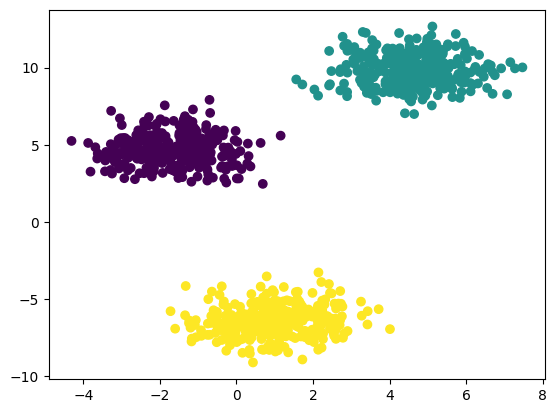

In [36]:
plt.scatter(X[:,0],X[:,1],c=y)

In [20]:
## Standardization-- feature scaling technique

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [23]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [24]:
from sklearn.cluster import KMeans


In [25]:
wcss=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [26]:
wcss

[1339.9999999999986,
 493.35614802033143,
 100.96375513738931,
 82.98404017034596,
 62.90239773054583,
 43.59978209271722,
 37.541590206821716,
 31.834554522237255,
 32.39071229128602,
 27.779471871873447]

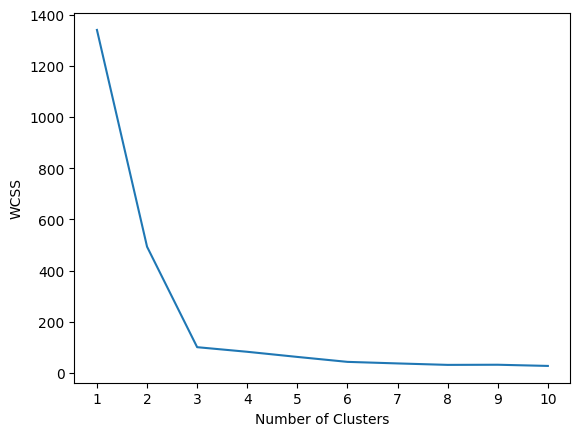

In [27]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [28]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [29]:
kmeans.fit_predict(X_train_scaled)

array([0, 0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 2, 2,
       1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 1, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1,
       2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2,
       1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 1,
       0, 0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1,
       2, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 1, 2, 1,
       1, 1, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2,
       2, 2, 1, 0, 0, 1, 2, 1, 2, 0, 0, 2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 1, 2, 2, 1,

In [30]:
y_pred=kmeans.predict(X_test_scaled)

In [31]:
y_pred

array([1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 1, 0, 0,
       0, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1,
       0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1, 0, 0, 0, 2,
       2, 1, 1, 2, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0,
       2, 2, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1,
       2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0,
       0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1,
       1, 2, 0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 2,
       0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2,
       0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0,

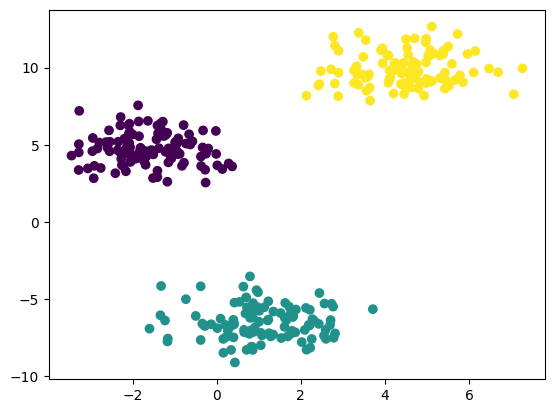

In [37]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [39]:
## Validating the k Values
## Knee Locator
## Silhoutee  scoring


In [40]:
#kneelocator
!pip install kneed

In [41]:
from kneed import KneeLocator


In [48]:
kl=KneeLocator(range(1,11),wcss,direction="decreasing",curve="convex")

In [49]:
kl.elbow

3

In [50]:
## silhouette Scoring
from sklearn.metrics import silhouette_score

In [52]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [53]:
silhouette_coefficients

[0.5108316429110528,
 0.7693011097980512,
 0.660836702681882,
 0.5596016487860556,
 0.46261228933445286,
 0.5306265363288168,
 0.4424057918768825,
 0.3986401477129497,
 0.3928716241357607]